# Importe modules

In [2]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *

# Plotting modules 
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns

# Read CTL : radiative budget, tas

## First model : CNRM-CM6-1

In [5]:
#------------- CNRM_amip : open files and read variables ----------------------
#
path_amip = "/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/"
filename_amipCTL = "*_amip_*.nc"
file_amipCTL = xr.open_mfdataset(path_amip+filename_amipCTL,combine='by_coords')
#
variables=['rlut', 'rsut','rsdt','tas']
df_amipCTL=file_amipCTL[variables].to_dataframe().drop('height',axis=1)
df1_amipCTL=df_amipCTL.reset_index(level=['time'])
df1_amipCTL['year']=pd.DatetimeIndex(df1_amipCTL['time']).year
amip_CTL=df1_amipCTL.groupby(['year']).mean()
amip_CTL

,rlut,rsut,rsdt,tas
year,,,,
1979,223.275009,104.139618,299.138092,277.855652
1980,223.970612,104.140114,299.196655,278.166199
1981,223.262955,104.145973,299.127747,277.915649
1982,222.993164,104.373184,299.053345,277.773010
1983,223.312180,104.616135,299.051910,278.057495
1984,223.359085,104.345650,299.036072,277.911255
1985,222.958160,104.328064,298.933105,277.875763
1986,223.420746,104.196419,298.937439,278.105347
1987,223.420807,104.409172,298.956879,278.121765


In [8]:
# Compute radiative budget 
amip_CTL['F']=amip_CTL['rsdt']
amip_CTL['H']=amip_CTL['rsut']+amip_CTL['rlut']
amip_CTL['N']=amip_CTL['F']-amip_CTL['H']

# reshape
year_list=range(2008,2014,1)
amipCTL=amip_CTL.drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
amipCTL

,rlut,rsut,rsdt,tas,F,H,N
0,223.275009,104.139618,299.138092,277.855652,299.138092,327.414612,-28.276520
1,223.970612,104.140114,299.196655,278.166199,299.196655,328.110718,-28.914062
2,223.262955,104.145973,299.127747,277.915649,299.127747,327.408936,-28.281189
3,222.993164,104.373184,299.053345,277.773010,299.053345,327.366333,-28.312988
4,223.312180,104.616135,299.051910,278.057495,299.051910,327.928314,-28.876404
5,223.359085,104.345650,299.036072,277.911255,299.036072,327.704742,-28.668671
6,222.958160,104.328064,298.933105,277.875763,298.933105,327.286224,-28.353119
7,223.420746,104.196419,298.937439,278.105347,298.937439,327.617157,-28.679718
8,223.420807,104.409172,298.956879,278.121765,298.956879,327.829987,-28.873108
9,223.186951,103.964806,299.106628,277.964325,299.106628,327.151764,-28.045135


In [9]:
#------------- CNRM_SST : open files and read variables ----------------------
#
path_sst = "/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/SST/"
filename_sstCTL = "*_piSST_*.nc"
file_sstCTL = xr.open_mfdataset(path_sst+filename_sstCTL,combine='by_coords')
#
variables=['rlut', 'rsut','rsdt','tas']
df_sstCTL=file_sstCTL[variables].to_dataframe().drop('height',axis=1)
df1_sstCTL=df_sstCTL.reset_index(level=['time'])
df1_sstCTL['year']=pd.DatetimeIndex(df1_sstCTL['time']).year
sst_CTL=df1_sstCTL.groupby(['year']).mean()
#sst_CTL

In [10]:
# Compute radiative budget 
sst_CTL['F']=sst_CTL['rsdt']
sst_CTL['H']=sst_CTL['rsut']+sst_CTL['rlut']
sst_CTL['N']=sst_CTL['F']-sst_CTL['H']

# reshape
sstCTL=sst_CTL.reset_index(level=['year']).drop(axis=1,columns='year')
#sstCTL

### Create plot

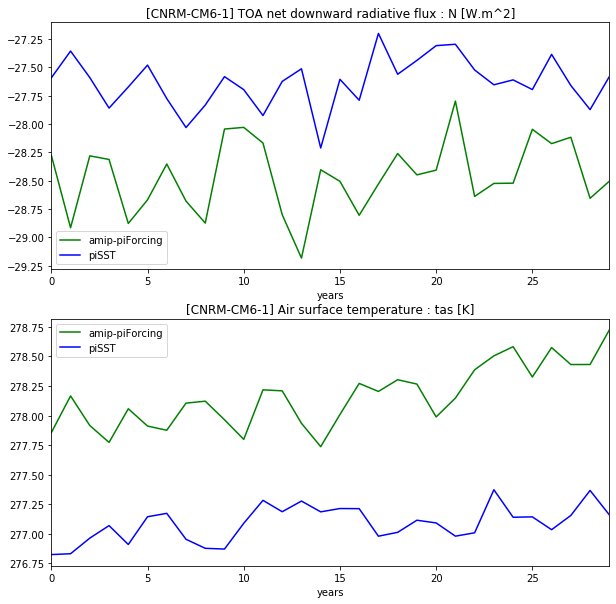

In [11]:
# Create plot of radiative budget
plt.subplot(211)
ax=plt.gca()
amipCTL.plot(y='N',kind='line',title='[CNRM-CM6-1] TOA net downward radiative flux : N [W.m^2]',legend=True, color='green',figsize=(10,10),ax=ax)
sstCTL.plot(y='N',kind='line',legend=True, color='blue',ax=ax)
plt.xlabel('years')
ax.legend(['amip-piForcing','piSST'])
#
# tas
plt.subplot(212)
ax1=plt.gca()
amipCTL.plot(y='tas',kind='line',title='[CNRM-CM6-1] Air surface temperature : tas [K]',legend=True, color='green',figsize=(10,10),ax=ax1)
sstCTL.plot(y='tas',kind='line',legend=True, color='blue',ax=ax1)
plt.xlabel('years')
ax1.legend(['amip-piForcing','piSST'])

## Second model : MRI-ESM2-0

In [13]:
#------------- MRI_amip : open files and read variables ----------------------
#
path_mri = "/data/scratch/globc/peatier/CMIP6/MRI-ESM2-0/amip/"
filename_mriCTL = "*_amip_*.nc"
file_mriCTL = xr.open_mfdataset(path_mri+filename_mriCTL,combine='by_coords')
#
variables=['rlut', 'rsut','rsdt','tas']
df_mriCTL=file_mriCTL[variables].to_dataframe().drop('height',axis=1)
df1_mriCTL=df_mriCTL.reset_index(level=['time'])
df1_mriCTL['year']=pd.DatetimeIndex(df1_mriCTL['time']).year
mri_CTL=df1_mriCTL.groupby(['year']).mean()
mri_CTL

,rlut,rsut,rsdt,tas
year,,,,
1979,224.471069,102.433746,298.892822,278.408295
1980,224.337143,103.005508,298.951447,278.379089
1981,224.392807,103.113625,298.884186,278.528839
1982,223.839401,103.590721,298.809204,278.325623
1983,224.221237,103.640564,298.806305,278.623810
1984,224.244171,102.863945,298.789154,278.635101
1985,223.701233,103.170227,298.689056,278.477264
1986,224.326828,102.642868,298.692535,278.593597
1987,224.529221,102.570999,298.711273,278.608673


In [14]:
# Compute radiative budget 
mri_CTL['F']=mri_CTL['rsdt']
mri_CTL['H']=mri_CTL['rsut']+mri_CTL['rlut']
mri_CTL['N']=mri_CTL['F']-mri_CTL['H']

# reshape
year_list=range(2008,2014,1)
mriCTL=mri_CTL.drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
mriCTL

,rlut,rsut,rsdt,tas,F,H,N
0,224.471069,102.433746,298.892822,278.408295,298.892822,326.904816,-28.011993
1,224.337143,103.005508,298.951447,278.379089,298.951447,327.342651,-28.391205
2,224.392807,103.113625,298.884186,278.528839,298.884186,327.506439,-28.622253
3,223.839401,103.590721,298.809204,278.325623,298.809204,327.430115,-28.620911
4,224.221237,103.640564,298.806305,278.623810,298.806305,327.861816,-29.055511
5,224.244171,102.863945,298.789154,278.635101,298.789154,327.108124,-28.318970
6,223.701233,103.170227,298.689056,278.477264,298.689056,326.871460,-28.182404
7,224.326828,102.642868,298.692535,278.593597,298.692535,326.969696,-28.277161
8,224.529221,102.570999,298.711273,278.608673,298.711273,327.100220,-28.388947
9,224.182983,102.924522,298.859436,278.468658,298.859436,327.107513,-28.248077


## Third model : CanESM5 

In [15]:
#------------- Can_amip : open files and read variables ----------------------
#
#path_Can = "/data/scratch/globc/peatier/CMIP6/CanESM5/amip/"
#filename_CanCTL = "*_amip-piForcing_*r1i1p2f1*.nc"
#file_CanCTL = xr.open_mfdataset(path_Can+filename_CanCTL,combine='by_coords')
#
#variables=['rlut', 'rsut','rsdt','tas']
#df_CanCTL=file_CanCTL[variables].to_dataframe().drop('height',axis=1)
#
#pd.to_datetime(df1_CanCTL['time'])
#
#
#xarr=df_CanCTL.to_xarray()
#xarr['year']=xarr.indexes['time'].to_datetimeindex().year
#xarr1=xarr.reset_index(['year'])
#X_Can_CTL=xarr.groupby(xarr['year']).mean()
#df=X_Can_CTL.to_dataframe()
#df
#df1_CanCTL=xarr.to_dataframe()
#df2_CanCTL=df1_CanCTL.reset_index(level=['time'])
#df2_CanCTL['year']=pd.DatetimeIndex(df2_CanCTL['time']).year
#df2_CanCTL

In [ ]:
# Compute radiative budget 
Can_CTL['F']=Can_CTL['rsdt']
Can_CTL['H']=Can_CTL['rsut']+Can_CTL['rlut']
Can_CTL['N']=Can_CTL['F']-Can_CTL['H']

# reshape
year_list=range(1870,1960,1)
yrlist=range(1990,2015,1)
CanCTL=Can_CTL.drop(year_list).drop(yrlist).reset_index(level=['year']).drop(axis=1,columns='year')
#CanCTL

# Read amip-p4xCO2 : radiative budget, tas

## First model : CNRM-CM6-1

In [16]:
#------------- CNRM_amip : open files and read variables ----------------------
#
filename_amip4xCO2 = "*_amip-4xCO2_*.nc"
file_amip4xCO2 = xr.open_mfdataset(path_amip+filename_amip4xCO2,combine='by_coords')
#
variables=['rlut', 'rsut','rsdt','tas']
df_amip4xCO2=file_amip4xCO2[variables].to_dataframe().drop('height',axis=1)
df1_amip4xCO2=df_amip4xCO2.reset_index(level=['time'])
df1_amip4xCO2['year']=pd.DatetimeIndex(df1_amip4xCO2['time']).year
amip_4xCO2=df1_amip4xCO2.groupby(['year']).mean()
#amip_4xCO2

In [17]:
# Compute radiative budget 
amip_4xCO2['F']=amip_4xCO2['rsdt']
amip_4xCO2['H']=amip_4xCO2['rsut']+amip_4xCO2['rlut']
amip_4xCO2['N']=amip_4xCO2['F']-amip_4xCO2['H']

# reshape
year_list=range(2009,2015,1)
amip4xCO2=amip_4xCO2.drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
#amip4xCO2

## Second model : MRI-ESM2-0

In [18]:
filename_mri4xCO2 = "*_amip-4xCO2_*.nc"
file_mri4xCO2 = xr.open_mfdataset(path_mri+filename_mri4xCO2,combine='by_coords')
#
variables=['rlut', 'rsut','rsdt','tas']
df_mri4xCO2=file_mri4xCO2[variables].to_dataframe().drop('height',axis=1)
df1_mri4xCO2=df_mri4xCO2.reset_index(level=['time'])
df1_mri4xCO2['year']=pd.DatetimeIndex(df1_mri4xCO2['time']).year
mri_4xCO2=df1_mri4xCO2.groupby(['year']).mean()
#mri_4xCO2

In [19]:
# Compute radiative budget 
mri_4xCO2['F']=mri_4xCO2['rsdt']
mri_4xCO2['H']=mri_4xCO2['rsut']+mri_4xCO2['rlut']
mri_4xCO2['N']=mri_4xCO2['F']-mri_4xCO2['H']

# reshape
year_list=range(2009,2015,1)
mri4xCO2=mri_4xCO2.drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
#mri4xCO2

## Third model : CanESM5 

# Read piSST-p4xCO2 : radiative budget, tas

In [20]:
#------------- CNRM_SST : open files and read variables ----------------------
#
filename_sst4xCO2 = "*_piSST-4xCO2_*.nc"
file_sst4xCO2 = xr.open_mfdataset(path_sst+filename_sst4xCO2,combine='by_coords')
#
df_sst4xCO2=file_sst4xCO2[variables].to_dataframe().drop('height',axis=1)
df1_sst4xCO2=df_sst4xCO2.reset_index(level=['time'])
df1_sst4xCO2['year']=pd.DatetimeIndex(df1_sst4xCO2['time']).year
sst_4xCO2=df1_sst4xCO2.groupby(['year']).mean()
#sst_4xCO2

In [21]:
# Compute radiative budget 
sst_4xCO2['F']=sst_4xCO2['rsdt']
sst_4xCO2['H']=sst_4xCO2['rsut']+sst_4xCO2['rlut']
sst_4xCO2['N']=sst_4xCO2['F']-sst_4xCO2['H']
sst4xCO2=sst_4xCO2.reset_index(level=['year'])#.drop(axis=1,columns='year')
#sst4xCO2

### Create plot

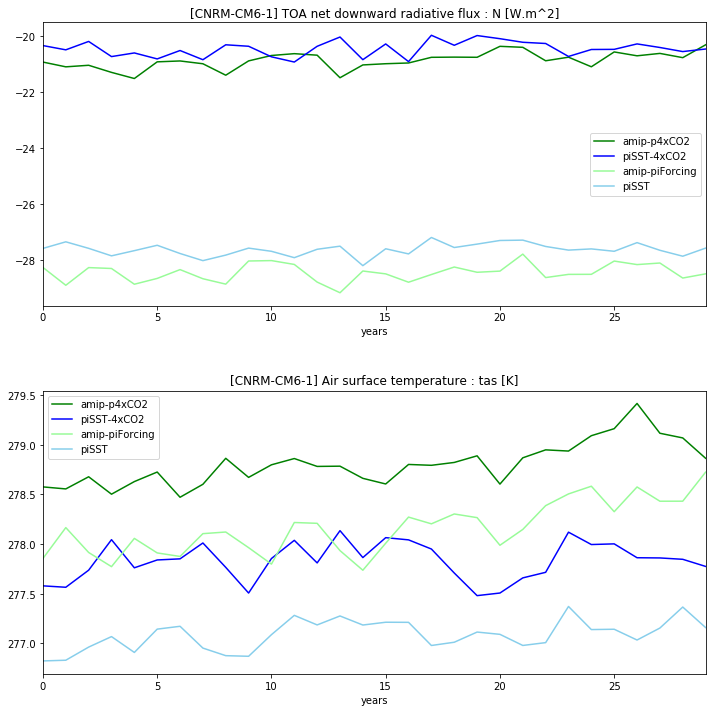

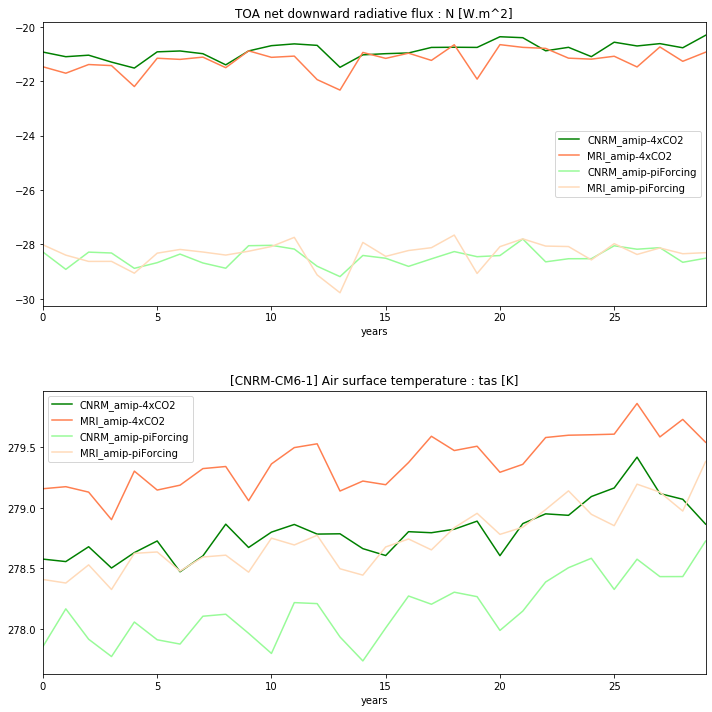

In [22]:
# Comparison amip and sst.............................................................
plt.subplots(figsize=(6,10))

plt.subplot(211)
ax=plt.gca()
amip4xCO2.plot(y='N',kind='line',title='[CNRM-CM6-1] TOA net downward radiative flux : N [W.m^2]',legend=True, color='green',figsize=(10,10),ax=ax)
sst4xCO2.plot(y='N',kind='line',legend=True, color='blue',ax=ax)
amipCTL.plot(y='N',kind='line',legend=True, color='palegreen',figsize=(10,10),ax=ax)
sstCTL.plot(y='N',kind='line',legend=True, color='skyblue',ax=ax)
plt.xlabel('years')
ax.legend(['amip-p4xCO2','piSST-4xCO2','amip-piForcing','piSST'])
#
# tas
plt.subplot(212)
ax1=plt.gca()
amip4xCO2.plot(y='tas',kind='line',title='[CNRM-CM6-1] Air surface temperature : tas [K]',legend=True, color='green',figsize=(10,10),ax=ax1)
sst4xCO2.plot(y='tas',kind='line',legend=True, color='blue',ax=ax1)
amipCTL.plot(y='tas',kind='line',legend=True, color='palegreen',figsize=(10,10),ax=ax1)
sstCTL.plot(y='tas',kind='line',legend=True, color='skyblue',ax=ax1)
plt.xlabel('years')
ax1.legend(['amip-p4xCO2','piSST-4xCO2','amip-piForcing','piSST'])

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)


# Inter model comparison..............................................................
plt.subplots(figsize=(6,10))

plt.subplot(211)
ax_model=plt.gca()
amip4xCO2.plot(y='N',kind='line',title='TOA net downward radiative flux : N [W.m^2]',legend=True, color='green',figsize=(10,10),ax=ax_model)
mri4xCO2.plot(y='N',kind='line',legend=True, color='coral',ax=ax_model)
amipCTL.plot(y='N',kind='line',legend=True, color='palegreen',figsize=(10,10),ax=ax_model)
mriCTL.plot(y='N',kind='line',legend=True, color='peachpuff',ax=ax_model)
plt.xlabel('years')
ax_model.legend(['CNRM_amip-4xCO2','MRI_amip-4xCO2','CNRM_amip-piForcing','MRI_amip-piForcing'])
#
# tas
plt.subplot(212)
ax_model1=plt.gca()
amip4xCO2.plot(y='tas',kind='line',title='[CNRM-CM6-1] Air surface temperature : tas [K]',legend=True, color='green',figsize=(10,10),ax=ax_model1)
mri4xCO2.plot(y='tas',kind='line',legend=True, color='coral',ax=ax_model1)
amipCTL.plot(y='tas',kind='line',legend=True, color='palegreen',figsize=(10,10),ax=ax_model1)
mriCTL.plot(y='tas',kind='line',legend=True, color='peachpuff',ax=ax_model1)
plt.xlabel('years')
ax_model1.legend(['CNRM_amip-4xCO2','MRI_amip-4xCO2','CNRM_amip-piForcing','MRI_amip-piForcing'])

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)


# Read amip-p4K : radiative budget, tas

## First model : CNRM-CM6-1

In [23]:
#------------- CNRM_amip-p4K : open files and read variables ----------------------
#
filename_amip4K = "*_amip-p4K_*.nc"
file_amip4K = xr.open_mfdataset(path_amip+filename_amip4K,combine='by_coords')
#
df_amip4K=file_amip4K[variables].to_dataframe().drop('height',axis=1)
df1_amip4K=df_amip4K.reset_index(level=['time'])
df1_amip4K['year']=pd.DatetimeIndex(df1_amip4K['time']).year
amip_p4K=df1_amip4K.groupby(['year']).mean()
#amip_p4K

In [24]:
# Compute radiative budget 
amip_p4K['F']=amip_p4K['rsdt']
amip_p4K['H']=amip_p4K['rsut']+amip_p4K['rlut']
amip_p4K['N']=amip_p4K['F']-amip_p4K['H']

# reshape
year_list=range(2008,2014,1)
amip4K=amip_p4K.drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
#amip4K

## Second model :  MRI-ESM2-0

In [34]:
#------------- CNRM_amip-p4K : open files and read variables ----------------------
#
filename_mrip4K = "*_amip-p4K_*.nc"
file_mrip4K = xr.open_mfdataset(path_mri+filename_mrip4K,combine='by_coords')
#
df_mrip4K=file_mrip4K[variables].to_dataframe().drop('height',axis=1)
df1_mrip4K=df_mrip4K.reset_index(level=['time'])
df1_mrip4K['year']=pd.DatetimeIndex(df1_mrip4K['time']).year
mri_p4K=df1_mrip4K.groupby(['year']).mean()
#amip_p4K

In [35]:
# Compute radiative budget 
mri_p4K['F']=mri_p4K['rsdt']
mri_p4K['H']=mri_p4K['rsut']+mri_p4K['rlut']
mri_p4K['N']=mri_p4K['F']-mri_p4K['H']

# reshape
year_list=range(2008,2014,1)
mrip4K=mri_p4K.drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
#amip4K

# Read amip-future4K : radiative budget, tas

## First model : CNRM-CM6-1

In [25]:
#------------- CNRM_amip-future4K : open files and read variables ----------------------
#
filename_amipfuture4K = "*_amip-future4K_*.nc"
file_amipfuture4K = xr.open_mfdataset(path_amip+filename_amipfuture4K,combine='by_coords')
#
df_amipfuture4K=file_amipfuture4K[variables].to_dataframe().drop('height',axis=1)
df1_amipfuture4K=df_amipfuture4K.reset_index(level=['time'])
df1_amipfuture4K['year']=pd.DatetimeIndex(df1_amipfuture4K['time']).year
amip_future4K=df1_amipfuture4K.groupby(['year']).mean()
#amip_future4K

In [26]:
# Compute radiative budget 
amip_future4K['F']=amip_future4K['rsdt']
amip_future4K['H']=amip_future4K['rsut']+amip_future4K['rlut']
amip_future4K['N']=amip_future4K['F']-amip_future4K['H']

# reshape
year_list=range(2008,2014,1)
amipfuture4K=amip_future4K.drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
#amipfuture4K

## Second model : MRI-ESM2-0

In [40]:
#------------- CNRM_amip-future4K : open files and read variables ----------------------
#
filename_mrifuture4K = "*_amip-future4K_*.nc"
file_mrifuture4K = xr.open_mfdataset(path_mri+filename_mrifuture4K,combine='by_coords')
#
df_mrifuture4K=file_mrifuture4K[variables].to_dataframe().drop('height',axis=1)
df1_mrifuture4K=df_mrifuture4K.reset_index(level=['time'])
df1_mrifuture4K['year']=pd.DatetimeIndex(df1_mrifuture4K['time']).year
mri_future4K=df1_mrifuture4K.groupby(['year']).mean()
mri_future4K

,rlut,rsut,rsdt,tas
year,,,,
1979,234.614273,101.157272,298.892822,283.295868
1980,234.444534,101.238174,298.951447,283.297241
1981,234.316513,101.468407,298.884186,283.257172
1982,233.881760,101.644806,298.809204,283.206757
1983,233.684692,102.444450,298.806305,283.442169
1984,233.560684,101.840057,298.789154,283.366577
1985,234.040848,101.110931,298.689056,283.390137
1986,234.338409,101.073006,298.692535,283.488983
1987,234.930435,100.793579,298.711273,283.565491


In [41]:
# Compute radiative budget 
mri_future4K['F']=mri_future4K['rsdt']
mri_future4K['H']=mri_future4K['rsut']+mri_future4K['rlut']
mri_future4K['N']=mri_future4K['F']-mri_future4K['H']

# reshape
year_list=range(2008,2014,1)
mrifuture4K=mri_future4K.drop(year_list).reset_index(level=['year']).drop(axis=1,columns='year')
mrifuture4K

,rlut,rsut,rsdt,tas,F,H,N
0,234.614273,101.157272,298.892822,283.295868,298.892822,335.771545,-36.878723
1,234.444534,101.238174,298.951447,283.297241,298.951447,335.682709,-36.731262
2,234.316513,101.468407,298.884186,283.257172,298.884186,335.784912,-36.900726
3,233.881760,101.644806,298.809204,283.206757,298.809204,335.526550,-36.717346
4,233.684692,102.444450,298.806305,283.442169,298.806305,336.129150,-37.322845
5,233.560684,101.840057,298.789154,283.366577,298.789154,335.400757,-36.611603
6,234.040848,101.110931,298.689056,283.390137,298.689056,335.151794,-36.462738
7,234.338409,101.073006,298.692535,283.488983,298.692535,335.411407,-36.718872
8,234.930435,100.793579,298.711273,283.565491,298.711273,335.723999,-37.012726
9,234.570557,101.399605,298.859436,283.530548,298.859436,335.970154,-37.110718


## Create plot

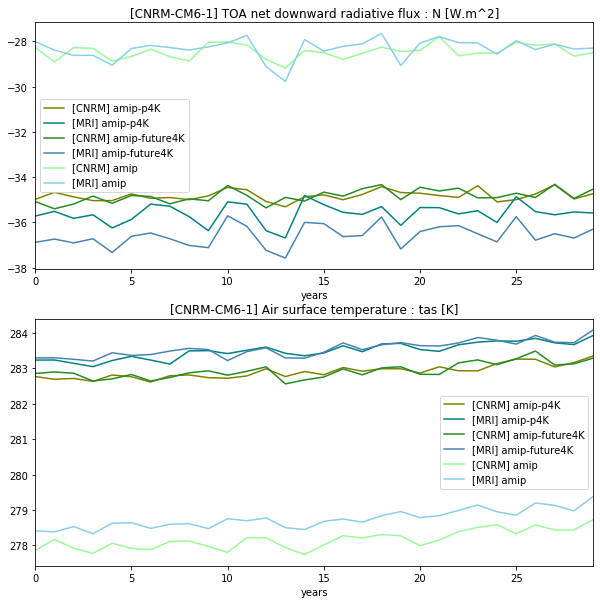

In [42]:
# Create plot of radiative budget
plt.subplot(211)
ax=plt.gca()
amip4K.plot(y='N',kind='line',title='[CNRM-CM6-1] TOA net downward radiative flux : N [W.m^2]',legend=True, color='olive',figsize=(10,10),ax=ax)
mrip4K.plot(y='N',kind='line',legend=True, color='teal',ax=ax)
amipfuture4K.plot(y='N',kind='line',legend=True, color='forestgreen',figsize=(10,10),ax=ax)
mrifuture4K.plot(y='N',kind='line',legend=True, color='steelblue',ax=ax)
amipCTL.plot(y='N',kind='line',legend=True, color='palegreen',figsize=(10,10),ax=ax)
mriCTL.plot(y='N',kind='line',legend=True, color='skyblue',ax=ax)
plt.xlabel('years')
ax.legend(['[CNRM] amip-p4K','[MRI] amip-p4K','[CNRM] amip-future4K','[MRI] amip-future4K','[CNRM] amip', '[MRI] amip'])
#
# tas
plt.subplot(212)
ax1=plt.gca()
amip4K.plot(y='tas',kind='line',legend=True, color='olive',figsize=(10,10),ax=ax1)
mrip4K.plot(y='tas',kind='line',legend=True, color='teal',ax=ax1)
amipfuture4K.plot(y='tas',kind='line',title='[CNRM-CM6-1] Air surface temperature : tas [K]',legend=True, color='forestgreen',figsize=(10,10),ax=ax1)
mrifuture4K.plot(y='tas',kind='line',legend=True, color='steelblue',ax=ax1)
amipCTL.plot(y='tas',kind='line',legend=True, color='palegreen',figsize=(10,10),ax=ax1)
mriCTL.plot(y='tas',kind='line',legend=True, color='skyblue',ax=ax1)
plt.xlabel('years')
ax1.legend(['[CNRM] amip-p4K','[MRI] amip-p4K','[CNRM] amip-future4K','[MRI] amip-future4K','[CNRM] amip', '[MRI] amip'])

# Compute : Delta(TOA), Delta(tas), Lambda

In [45]:
result= pd.DataFrame()

i=1
N=len(amip4xCO2)

Lbda_amip=[]
Lbda_sst=[]
Lbda_amip4K=[]
Lbda_amipfuture4K=[]

Lbda_mri=[]
Lbda_mrip4K=[]
Lbda_mrifuture4K=[]

DN_amip=[]
DN_sst=[]
DN_amip4K=[]
DN_amipfuture4K=[]

DN_mri=[]
DN_mrip4K=[]
DN_mrifuture4K=[]

Dtas_amip=[]
Dtas_sst=[]
Dtas_amip4K=[]
Dtas_amipfuture4K=[]

Dtas_mri=[]
Dtas_mrip4K=[]
Dtas_mrifuture4K=[]

while i<N:
    
    amipCTL_tmp=amipCTL.iloc[0:i,:]
    sstCTL_tmp=sstCTL.iloc[0:i,:]    
    mriCTL_tmp=mriCTL.iloc[0:i,:]
    
    amip4xCO2_tmp=amip4xCO2.iloc[0:i,:]
    Delta_N_amip=(amip4xCO2_tmp['N']-amipCTL_tmp['N']).mean()
    Delta_tas_amip=(amip4xCO2_tmp['tas']-amipCTL_tmp['tas']).mean()
    Lambda_amip=Delta_N_amip/Delta_tas_amip
    Lbda_amip.append(Lambda_amip)
    DN_amip.append(Delta_N_amip)
    Dtas_amip.append(Delta_tas_amip)
    
    sst4xCO2_tmp=sst4xCO2.iloc[0:i,:]
    Delta_N_sst=sst4xCO2_tmp['N'].mean()-sstCTL_tmp['N'].mean()
    Delta_tas_sst=sst4xCO2_tmp['tas'].mean()-sstCTL_tmp['tas'].mean()
    Lambda_sst=Delta_N_sst/Delta_tas_sst
    Lbda_sst.append(Lambda_sst)
    DN_sst.append(Delta_N_sst)
    Dtas_sst.append(Delta_tas_sst)
        
    amip4K_tmp=amip4K.iloc[0:i,:]
    Delta_N_amip4K=amip4K_tmp['N'].mean()-amipCTL_tmp['N'].mean()
    Delta_tas_amip4K=amip4K_tmp['tas'].mean()-amipCTL_tmp['tas'].mean()
    Lambda_amip4K=Delta_N_amip4K/Delta_tas_amip4K
    Lbda_amip4K.append(Lambda_amip4K)
    DN_amip4K.append(Delta_N_amip4K)
    Dtas_amip4K.append(Delta_tas_amip4K)    
    
    amipfuture4K_tmp=amipfuture4K.iloc[0:i,:]
    Delta_N_amipfuture4K=amipfuture4K_tmp['N'].mean()-amipCTL_tmp['N'].mean()
    Delta_tas_amipfuture4K=amipfuture4K_tmp['tas'].mean()-amipCTL_tmp['tas'].mean()
    Lambda_amipfuture4K=Delta_N_amipfuture4K/Delta_tas_amipfuture4K
    Lbda_amipfuture4K.append(Lambda_amipfuture4K)
    DN_amipfuture4K.append(Delta_N_amipfuture4K)
    Dtas_amipfuture4K.append(Delta_tas_amipfuture4K)   

    mri4xCO2_tmp=mri4xCO2.iloc[0:i,:]
    Delta_N_mri=(mri4xCO2_tmp['N']-mriCTL_tmp['N']).mean()
    Delta_tas_mri=(mri4xCO2_tmp['tas']-mriCTL_tmp['tas']).mean()
    Lambda_mri=Delta_N_mri/Delta_tas_mri
    Lbda_mri.append(Lambda_mri)
    DN_mri.append(Delta_N_mri)
    Dtas_mri.append(Delta_tas_mri)    

    mrip4K_tmp=mrip4K.iloc[0:i,:]
    Delta_N_mrip4K=mrip4K_tmp['N'].mean()-mriCTL_tmp['N'].mean()
    Delta_tas_mrip4K=mrip4K_tmp['tas'].mean()-mriCTL_tmp['tas'].mean()
    Lambda_mrip4K=Delta_N_mrip4K/Delta_tas_mrip4K
    Lbda_mrip4K.append(Lambda_mrip4K)
    DN_mrip4K.append(Delta_N_mrip4K)
    Dtas_mrip4K.append(Delta_tas_mrip4K)    
    
    mrifuture4K_tmp=mrifuture4K.iloc[0:i,:]
    Delta_N_mrifuture4K=mrifuture4K_tmp['N'].mean()-mriCTL_tmp['N'].mean()
    Delta_tas_mrifuture4K=mrifuture4K_tmp['tas'].mean()-mriCTL_tmp['tas'].mean()
    Lambda_mrifuture4K=Delta_N_mrifuture4K/Delta_tas_mrifuture4K
    Lbda_mrifuture4K.append(Lambda_mrifuture4K)
    DN_mrifuture4K.append(Delta_N_mrifuture4K)
    Dtas_mrifuture4K.append(Delta_tas_mrifuture4K)       
    
    
    i=i+1
 
result['Delta_N_amip4xCO2']=DN_amip
result['Delta_tas_amip4xCO2']=Dtas_amip
result['Lambda_amip4xCO2']=Lbda_amip

result['Delta_N_amip4K']=DN_amip4K
result['Delta_tas_amip4K']=Dtas_amip4K
result['Lambda_amip4K']=Lbda_amip4K

result['Delta_N_amipfuture4K']=DN_amipfuture4K
result['Delta_tas_amipfuture4K']=Dtas_amipfuture4K
result['Lambda_amipfuture4K']=Lbda_amipfuture4K

result['Delta_N_mri4xCO2']=DN_mri
result['Delta_tas_mri4xCO2']=Dtas_mri
result['Lambda_mri4xCO2']=Lbda_mri

result['Delta_N_mrip4K']=DN_mrip4K
result['Delta_tas_mrip4K']=Dtas_mrip4K
result['Lambda_mrip4K']=Lbda_mrip4K

result['Delta_N_mrifuture4K']=DN_mrifuture4K
result['Delta_tas_mrifuture4K']=Dtas_mrifuture4K
result['Lambda_mrifuture4K']=Lbda_mrifuture4K

result['Delta_N_sst']=DN_sst
result['Delta_tas_sst']=Dtas_sst
result['Lambda_sst']=Lbda_sst

result

,Delta_N_amip4xCO2,Delta_tas_amip4xCO2,Lambda_amip4xCO2,Delta_N_amip4K,Delta_tas_amip4K,Lambda_amip4K,Delta_N_amipfuture4K,Delta_tas_amipfuture4K,Lambda_amipfuture4K,Delta_N_mri4xCO2,...,Lambda_mri4xCO2,Delta_N_mrip4K,Delta_tas_mrip4K,Lambda_mrip4K,Delta_N_mrifuture4K,Delta_tas_mrifuture4K,Lambda_mrifuture4K,Delta_N_sst,Delta_tas_sst,Lambda_sst
0,7.350189,0.720551,10.200796,-6.701691,4.913544,-1.363922,-6.799255,4.998291,-1.360316,6.544800,...,8.748470,-7.703613,4.825836,-1.596327,-8.866730,4.887573,-1.814137,7.258270,0.756134,9.599185
1,7.583893,0.555115,13.661847,-6.228592,4.719543,-1.319745,-6.639771,4.865326,-1.364712,6.616394,...,8.580259,-7.411575,4.841675,-1.530787,-8.603394,4.902893,-1.754759,7.064407,0.745544,9.475501
2,7.469401,0.624268,11.965063,-6.348295,4.746307,-1.337523,-6.727457,4.892548,-1.375042,6.823618,...,9.557986,-7.339743,4.765869,-1.540064,-8.495085,4.844727,-1.753470,7.177723,0.755249,9.503783
3,7.356522,0.650658,11.306286,-6.441551,4.774414,-1.349182,-6.676025,4.886810,-1.366131,6.917053,...,10.181043,-7.264526,4.755035,-1.527754,-8.395424,4.853821,-1.729653,7.166069,0.810486,8.841696
4,7.357642,0.634985,11.587105,-6.384466,4.770599,-1.338294,-6.596071,4.838684,-1.363195,6.905982,...,10.169930,-7.248547,4.723633,-1.534528,-8.369804,4.846741,-1.726893,7.147955,0.818878,8.728960
5,7.423147,0.664922,11.163935,-6.331942,4.784088,-1.323542,-6.519968,4.851471,-1.343916,6.949316,...,10.675734,-7.297998,4.720428,-1.546046,-8.356943,4.827515,-1.731107,7.068192,0.798523,8.851583
6,7.429421,0.655099,11.340914,-6.367590,4.777618,-1.332796,-6.517015,4.839417,-1.346653,6.954769,...,10.550991,-7.256390,4.725708,-1.535514,-8.346001,4.839722,-1.724479,7.096235,0.781494,9.080343
7,7.462406,0.635353,11.745290,-6.348873,4.766113,-1.332086,-6.514500,4.814240,-1.353173,6.981014,...,10.452721,-7.224972,4.701111,-1.536865,-8.357964,4.846680,-1.724472,7.108017,0.816162,8.709075
8,7.464023,0.647247,11.531949,-6.323479,4.757996,-1.329022,-6.466572,4.807404,-1.345128,6.970767,...,10.328961,-7.239174,4.721649,-1.533188,-8.387501,4.858917,-1.726208,7.154505,0.824280,8.679705
9,7.433728,0.653293,11.378860,-6.369144,4.759521,-1.338190,-6.519493,4.823242,-1.351683,7.010404,...,10.521400,-7.326771,4.752655,-1.541616,-8.435013,4.879181,-1.728776,7.161434,0.805573,8.889869


In [46]:
# Lambda mean : 

L_amip=Lbda_amip[10:28]
Lamip=mean(L_amip)
#Lamip

L_sst=Lbda_sst[10:28]
Lsst=mean(L_sst)
#Lsst

L_amip4K=Lbda_amip4K[10:28]
Lamip4K=mean(L_amip4K)
#Lamip4K

L_amipfuture4K=Lbda_amipfuture4K[10:28]
Lamipfuture4K=mean(L_amipfuture4K)
Lamipfuture4K


-1.3367628

# Create plots

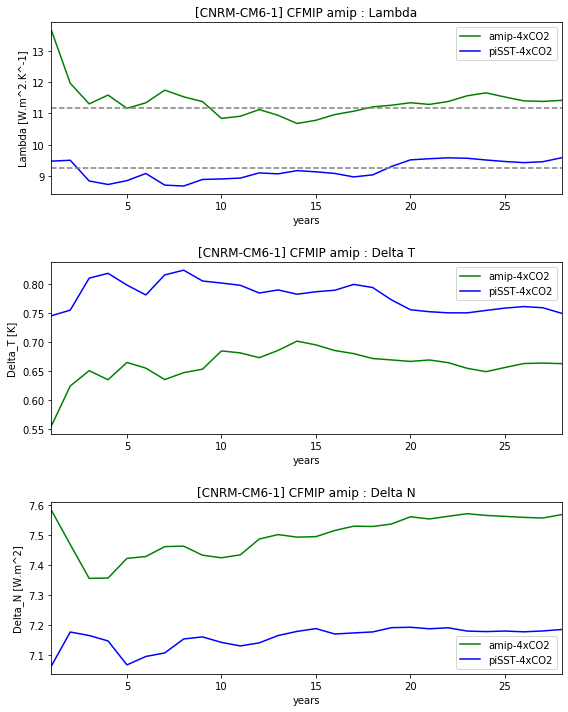

In [48]:
#--------------------------- Plot result : 4xCO2, amip and SST --------------------------------------
plt.subplots(figsize=(8,10))

plt.subplot(311)
ax2=plt.gca()
result.plot(y='Lambda_amip4xCO2',kind='line',title='[CNRM-CM6-1] CFMIP amip : Lambda',legend=True, color='green',ax=ax2)
result.plot(y='Lambda_sst',kind='line',legend=True, color='blue',ax=ax2)
ax2.axhline(y=Lamip, xmin=0, xmax=36, ls='--', color='grey')
ax2.axhline(y=Lsst, xmin=0, xmax=36, ls='--', color='grey')
ax2.set_xlabel('years')
ax2.set_ylabel('Lambda [W.m^2.K^-1]')
ax2.legend(['amip-4xCO2','piSST-4xCO2'])
#ax2.set_ylim([6,10])
ax2.set_xlim([1,28])

plt.subplot(312)
ax3=plt.gca()
result.plot(y='Delta_tas_amip4xCO2',kind='line',title='[CNRM-CM6-1] CFMIP amip : Delta T',legend=True, color='green',ax=ax3)
result.plot(y='Delta_tas_sst',kind='line',legend=True, color='blue',ax=ax3)
ax3.set_xlabel('years')
ax3.set_ylabel('Delta_T [K]')
ax3.legend(['amip-4xCO2','piSST-4xCO2'])
#ax3.set_ylim([0,2])
ax3.set_xlim([1,28])

plt.subplot(313)
ax4=plt.gca()
result.plot(y='Delta_N_amip4xCO2',kind='line',color='green',title='[CNRM-CM6-1] CFMIP amip : Delta N',legend=True,ax=ax4)
result.plot(y='Delta_N_sst',kind='line',color='blue',legend=True,ax=ax4)
ax4.set_xlabel('years')
ax4.set_ylabel('Delta_N [W.m^2]')
ax4.legend(['amip-4xCO2','piSST-4xCO2'])
#ax4.set_ylim([6.5,8.5])
ax4.set_xlim([1,28])

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.40)

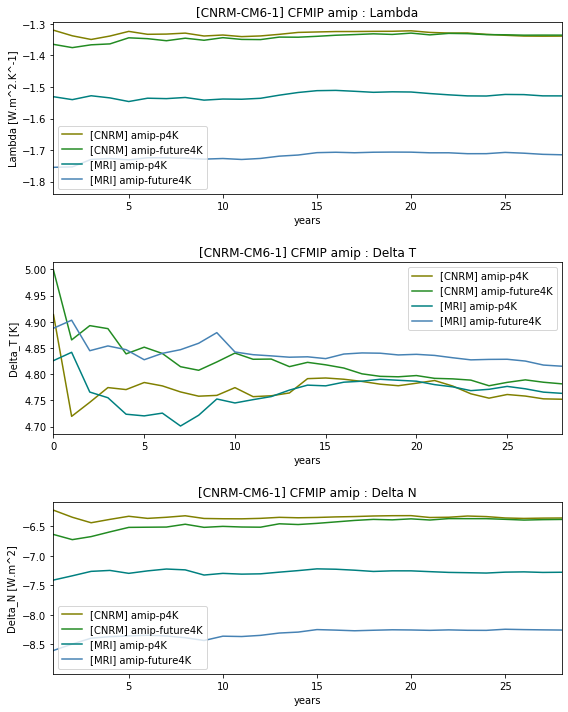

In [49]:
#--------------------------- Plot result : p4K and future4K --------------------------------------
plt.subplots(figsize=(8,10))

plt.subplot(311)
ax_4K=plt.gca()
result.plot(y='Lambda_amip4K',kind='line',title='[CNRM-CM6-1] CFMIP amip : Lambda',legend=True, color='olive',ax=ax_4K)
result.plot(y='Lambda_amipfuture4K',kind='line',legend=True, color='forestgreen',ax=ax_4K)
result.plot(y='Lambda_mrip4K',kind='line',legend=True, color='teal',ax=ax_4K)
result.plot(y='Lambda_mrifuture4K',kind='line',legend=True, color='steelblue',ax=ax_4K)
#ax_4K.axhline(y=Lamip4K, xmin=0, xmax=36, ls='--', color='grey')
#ax_4K.axhline(y=Lamipfuture4K, xmin=0, xmax=36, ls='--', color='grey')
ax_4K.set_xlabel('years')
ax_4K.set_ylabel('Lambda [W.m^2.K^-1]')
ax_4K.legend(['[CNRM] amip-p4K','[CNRM] amip-future4K', '[MRI] amip-p4K','[MRI] amip-future4K'])
#ax2.set_ylim([6,10])
ax_4K.set_xlim([1,28])

plt.subplot(312)
ax_4K1=plt.gca()
result.plot(y='Delta_tas_amip4K',kind='line',title='[CNRM-CM6-1] CFMIP amip : Delta T',legend=True, color='olive',ax=ax_4K1)
result.plot(y='Delta_tas_amipfuture4K',kind='line',legend=True, color='forestgreen',ax=ax_4K1)
result.plot(y='Delta_tas_mrip4K',kind='line',legend=True, color='teal',ax=ax_4K1)
result.plot(y='Delta_tas_mrifuture4K',kind='line',legend=True, color='steelblue',ax=ax_4K1)
ax_4K1.set_xlabel('years')
ax_4K1.set_ylabel('Delta_T [K]')
ax_4K1.legend(['[CNRM] amip-p4K','[CNRM] amip-future4K', '[MRI] amip-p4K','[MRI] amip-future4K'])
#ax_4K1.set_ylim([0,3])
ax3.set_xlim([1,28])

plt.subplot(313)
ax_4K2=plt.gca()
result.plot(y='Delta_N_amip4K',kind='line',color='olive',title='[CNRM-CM6-1] CFMIP amip : Delta N',legend=True,ax=ax_4K2)
result.plot(y='Delta_N_amipfuture4K',kind='line',color='forestgreen',legend=True,ax=ax_4K2)
result.plot(y='Delta_N_mrip4K',kind='line',legend=True, color='teal',ax=ax_4K2)
result.plot(y='Delta_N_mrifuture4K',kind='line',legend=True, color='steelblue',ax=ax_4K2)
ax_4K2.set_xlabel('years')
ax_4K2.set_ylabel('Delta_N [W.m^2]')
ax_4K2.legend(['[CNRM] amip-p4K','[CNRM] amip-future4K', '[MRI] amip-p4K','[MRI] amip-future4K'])
#ax_4K2.set_ylim([6.5,9.5])
ax_4K2.set_xlim([1,28])

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.40)

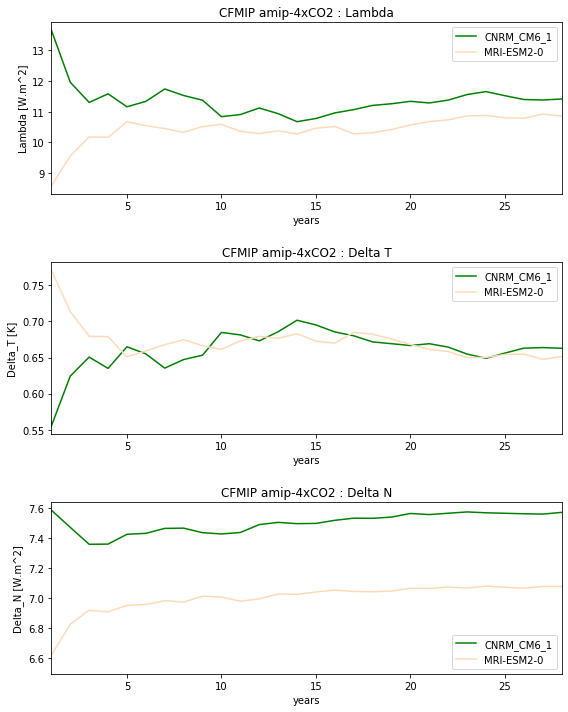

In [50]:
#--------------------------- Plot result : 4xCO2, multi-model--------------------------------------
plt.subplots(figsize=(8,10))

plt.subplot(311)
ax_multimodel=plt.gca()
result.plot(y='Lambda_amip4xCO2',kind='line',title='CFMIP amip-4xCO2 : Lambda',legend=True, color='green',ax=ax_multimodel)
result.plot(y='Lambda_mri4xCO2',kind='line',legend=True, color='peachpuff',ax=ax_multimodel)
#ax_multimodel.axhline(y=Lamip, xmin=0, xmax=36, ls='--', color='grey')
#ax_multimodel.axhline(y=Lsst, xmin=0, xmax=36, ls='--', color='grey')
ax_multimodel.set_xlabel('years')
ax_multimodel.set_ylabel('Lambda [W.m^2]')
ax_multimodel.legend(['CNRM_CM6_1','MRI-ESM2-0'])
#ax_multimodel.set_ylim([6,10])
ax_multimodel.set_xlim([1,28])

plt.subplot(312)
ax_multimodel1=plt.gca()
result.plot(y='Delta_tas_amip4xCO2',kind='line',title='CFMIP amip-4xCO2 : Delta T',legend=True, color='green',ax=ax_multimodel1)
result.plot(y='Delta_tas_mri4xCO2',kind='line',legend=True, color='peachpuff',ax=ax_multimodel1)
ax_multimodel1.set_xlabel('years')
ax_multimodel1.set_ylabel('Delta_T [K]')
ax_multimodel1.legend(['CNRM_CM6_1','MRI-ESM2-0'])
#ax_multimodel1.set_ylim([0,2])
ax_multimodel1.set_xlim([1,28])

plt.subplot(313)
ax_multimodel2=plt.gca()
result.plot(y='Delta_N_amip4xCO2',kind='line',color='green',title='CFMIP amip-4xCO2 : Delta N',legend=True,ax=ax_multimodel2)
result.plot(y='Delta_N_mri4xCO2',kind='line',color='peachpuff',legend=True,ax=ax_multimodel2)
ax_multimodel2.set_xlabel('years')
ax_multimodel2.set_ylabel('Delta_N [W.m^2]')
ax_multimodel2.legend(['CNRM_CM6_1','MRI-ESM2-0'])
#ax_multimodel2.set_ylim([6.5,8.5])
ax_multimodel2.set_xlim([1,28])

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.40)